In [11]:
import numpy as np
import matplotlib.pyplot as plt

nsteps, apx, apy,perix, periy = np.loadtxt('M_Euler_results.csv', delimiter=',')

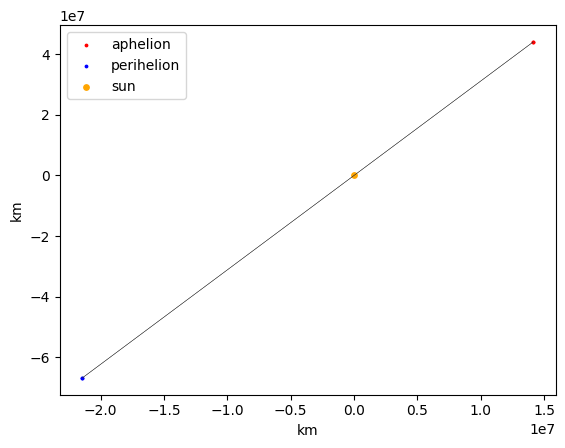

In [13]:
# plt.figure(figsize=(3, 2), dpi=80)
plt.plot([apx[-2], perix[-2]], [apy[-2], periy[-2] ], c="grey", linewidth = 0.3)
plt.plot([apx[-1], perix[-1]], [apy[-1], periy[-1]], c="black", linewidth = 0.3)
plt.scatter(apx[-1], apy[-1], s=3, c="red",label="aphelion")
plt.scatter(apx[-2], apy[-2], s=3, c="red")
plt.scatter(perix[-1], periy[-1], s=3, c="blue",label="perihelion")
plt.scatter(perix[-2], periy[-2], s=3, c="blue")
plt.scatter(0,0, s = 15, c = "orange", label = "sun")
plt.xlabel("km")
plt.ylabel("km")
# plt.ylim(0.92e6, 0.945e6)
# plt.xlim(-3.01e7, -2.95e7)
plt.legend()


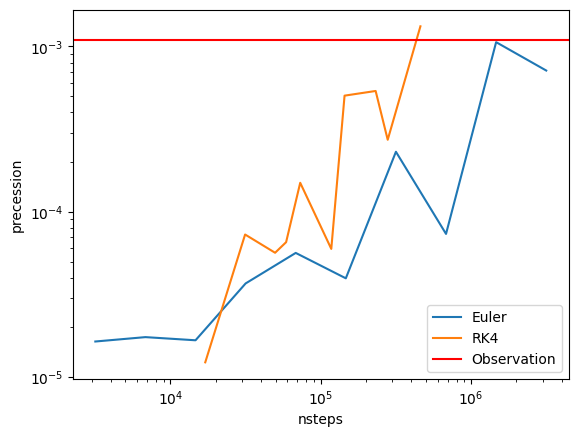

In [29]:
numsteps, apx, apy,perix, periy = np.loadtxt('M_RK4_results.csv', delimiter=',')


diff_theta_rk = np.array([])

for i in range(int(len(apx)/2)):
    theta_i = np.arctan2(abs(apy[2*i]-periy[2*i]), abs(apx[2*i]-perix[2*i]))
    theta_f = np.arctan2(abs(apy[2*i+1]-periy[2*i+1]), abs(apx[2*i+1]-perix[2*i+1]))
    diff = abs(theta_f - theta_i)
    diff_theta_rk = np.insert(diff_theta_rk, 0, diff, axis=0)

# for i in range(int(len(apx)/2)):
#     theta_i = np.arctan2(periy[2*i], perix[2*i])
#     theta_f = np.arctan2(periy[2*i+1], perix[2*i+1])
#     diff = abs(theta_f - theta_i)
#     diff_theta_rk = np.insert(diff_theta_rk, 0, diff, axis=0)

numstep = numsteps[0:10]


plt.figure()
plt.loglog(nstep, diff_theta, label="Euler")
plt.loglog(numstep, diff_theta_rk, label="RK4")
plt.axhline(y = 0.00146*3/4, c="red", label = "Observation")
plt.legend()
plt.xlabel("nsteps")
plt.ylabel("precession")
plt.show()